In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
datos

,title,abstract,categorical,categoria,cat_one_hot,abstract_limpio,abstract_preprocesado
0,Electromagnetic neutrinos in laboratory experi...,An overview of neutrino electromagnetic proper...,astrophysics,humano,"[1, 0, 0, 0, 0]",An overview of neutrino electromagnetic proper...,"['overview', 'neutrino', 'electromagnetic', 'p..."
1,Infrared complex refractive index of astrophys...,In dense and cold regions of the interstellar ...,astrophysics,humano,"[1, 0, 0, 0, 0]",In dense and cold regions of the interstellar ...,"['dense', 'cold', 'region', 'interstellar', 'm..."
2,Gamma-ray lines in modern astrophysics,Gamma-ray astronomy provides a direct window i...,astrophysics,humano,"[1, 0, 0, 0, 0]",Gamma-ray astronomy provides a direct window i...,"['gamma-ray', 'astronomy', 'provides', 'direct..."
3,From Coulomb excitation cross sections to non-...,Coulomb and nuclear dissociation of $^{17}$Ne ...,astrophysics,humano,"[1, 0, 0, 0, 0]",Coulomb and nuclear dissociation of $^{17}$Ne ...,"['coulomb', 'nuclear', 'dissociation', 'ne', '..."
4,Astrophysical Black Holes: A Compact Pedagogic...,Black holes are among the most extreme objects...,astrophysics,humano,"[1, 0, 0, 0, 0]",Black holes are among the most extreme objects...,"['black', 'hole', 'among', 'extreme', 'object'..."
...,...,...,...,...,...,...,...
7745,Superconducting LaAlO3/SrTiO3 Nanowires,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe've achieved a groundbreaking breakthrou...,"[""'ve"", 'achieved', 'groundbreaking', 'breakth..."
7746,Coupling a single Nitrogen-Vacancy center to a...,Here's a rewritten version of the text in my o...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe propose a groundbreaking idea: connecti...,"['propose', 'groundbreaking', 'idea', 'connect..."
7747,Superconducting and Anti-Ferromagnetic Phases ...,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nThis study establishes a connection betwee...,"['study', 'establishes', 'connection', 'two', ..."
7748,New Superconductivity Dome in LaFeAsO$_{1-x}$F...,Here's the rewritten text:\n\nA fascinating ph...,superconductivity,llama3,"[0, 0, 0, 0, 1]",Here's the rewritten text:\n\nA fascinating ph...,"[""'s"", 'rewritten', 'text', 'fascinating', 'ph..."


In [11]:
texto_preprocesado = datos['abstract_preprocesado'].tolist()
lista_de_listas = [eval(cadena) for cadena in texto_preprocesado]

print(len(lista_de_listas))
print(type(lista_de_listas[0]))

7750
<class 'list'>


In [12]:
def generar_n_gramas(tokens, n):
    n_gramas = ngrams(tokens, n)
    return list(n_gramas)
    
def calculo_de_n_gramas(texto):
    #print(f"este es el texto: {type(texto)}")
    unigramas_limpios = []
    texto = eval(texto)
    # Calculo de unigramas limpios
    unigramas = generar_n_gramas(texto, 1)
    for uni in unigramas:
        unigramas_limpios.append(uni[0])
    #print(f"Unigramas: {unigramas}")
    
    bigramas_limpios = []
    bigramas = generar_n_gramas(texto, 2)
    for big in bigramas:
        bigrama_final = str(big[0]) + " " + str(big[1])
        bigramas_limpios.append(bigrama_final)
        
    #print(f"Bigramas: {bigramas}")
    #trigramas = generar_n_gramas(texto, 3)
    #print(f"Tirgramas: {trigramas}")
    n_gramas = unigramas_limpios + bigramas_limpios
    return n_gramas

def obtener_vocabulario(lista_n_gramas):
    vocabulario = set()
    for lista in lista_n_gramas:
        for token in lista:
            vocabulario.add(token)
    return vocabulario

In [13]:
from nltk.util import ngrams

lista_n_gramas = []

i = 0

for texto_tokens in texto_preprocesado:
        retorno = calculo_de_n_gramas(texto_tokens)
        lista_n_gramas.append(retorno)


In [14]:
vocabulario = obtener_vocabulario(lista_n_gramas)
print(len(vocabulario))
vocabulario = list(vocabulario)

277702


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir la lista de listas de tokens a una lista de textos
textos = [' '.join(lista) for lista in lista_de_listas]

# Inicializar el vectorizador TF-IDF
vectorizador = TfidfVectorizer(vocabulary=vocabulario)

# Aplicar TF-IDF a los textos
tfidf_matrix = vectorizador.fit_transform(textos)

# Obtener la matriz TF-IDF como una matriz densa
tfidf_matrix_dense = tfidf_matrix.todense()

print("Matriz TF-IDF:")
print(tfidf_matrix_dense)
dimensiones = tfidf_matrix.shape
# Dimensiones devuelve una tupla (número de filas, número de columnas)
numero_filas = dimensiones[0]
numero_columnas = dimensiones[1]
print("Número de filas:", numero_filas)
print("Número de columnas:", numero_columnas)
df_tfidf = pd.DataFrame(tfidf_matrix_dense, columns=vocabulario)

F:\nuevo_conocimiento\gpu_cuda\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Número de filas: 7750
Número de columnas: 277702


In [16]:
df_etiquetas = datos['cat_one_hot']
df_junto = pd.concat([df_tfidf, df_etiquetas], axis=1)
df_junto


,different strategy,may small,logarithmic divergence,adjusting magnetic,activity 'membrane,methodical rooted,phenomenon berezinskii-kosterlitz-thouless,supergravity fundamental,markedly different,resulting tightly-bound,...,fraction focus,profound supergeneralization,two lecture,q=mns/mbh ranging,state bounded,topology 'we,crystal measuring,process deriving,relation governed,cat_one_hot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"


In [20]:
ruta_archivo_csv = "n_gramas_tfidf.csv"
df_junto.to_csv(ruta_archivo_csv, index=False)

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [18]:
def knn_classification(dataset,n_neighbors,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Entrenar el modelo de regresión logística
        modelo_knn.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_knn.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_val_simple_13_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/knn_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_knn, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_val_cruz_13_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/knn_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta KNN_val_simple_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.1.png


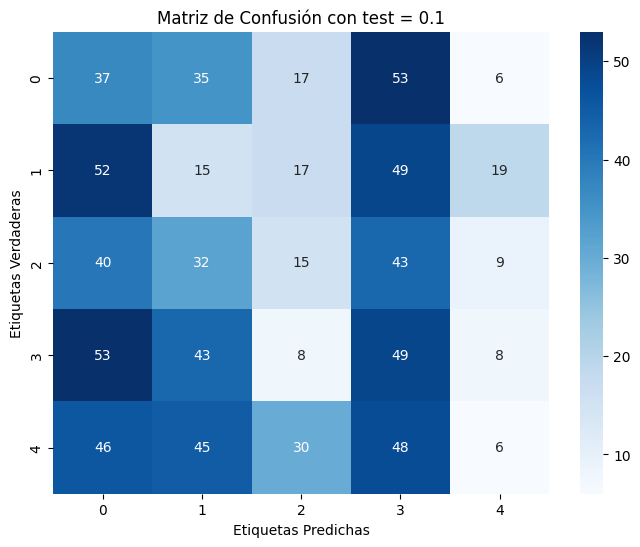

Exactitud del modelo: 0.15741935483870967
Precisión del modelo: 0.1495083862717804
Recall del modelo: 0.15741935483870967
Puntuación F1 del modelo: 0.14233404234108207
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.2.png


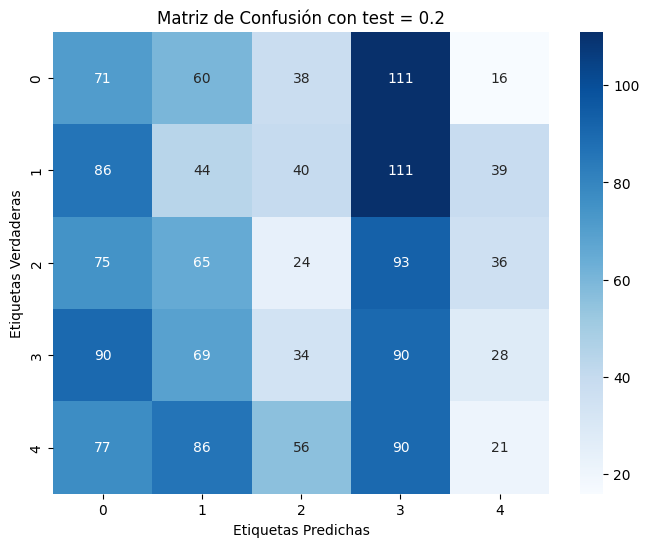

Exactitud del modelo: 0.16129032258064516
Precisión del modelo: 0.15406382184961698
Recall del modelo: 0.16129032258064516
Puntuación F1 del modelo: 0.1497714839067886
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.3.png


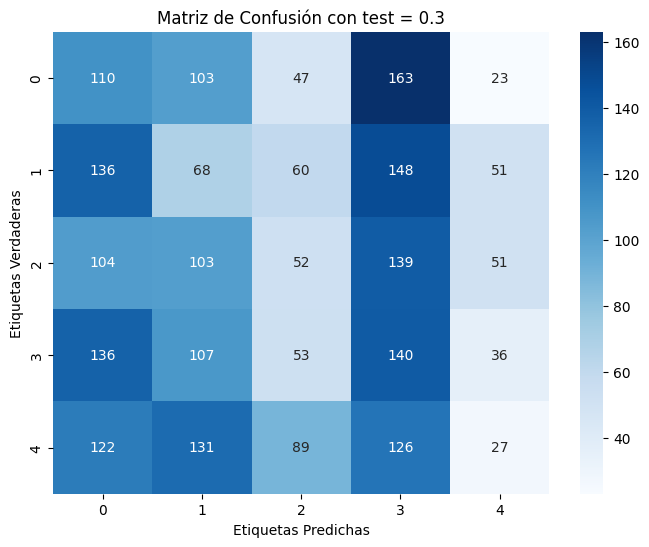

Exactitud del modelo: 0.170752688172043
Precisión del modelo: 0.16478796198330647
Recall del modelo: 0.170752688172043
Puntuación F1 del modelo: 0.15927691689946405
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.4.png


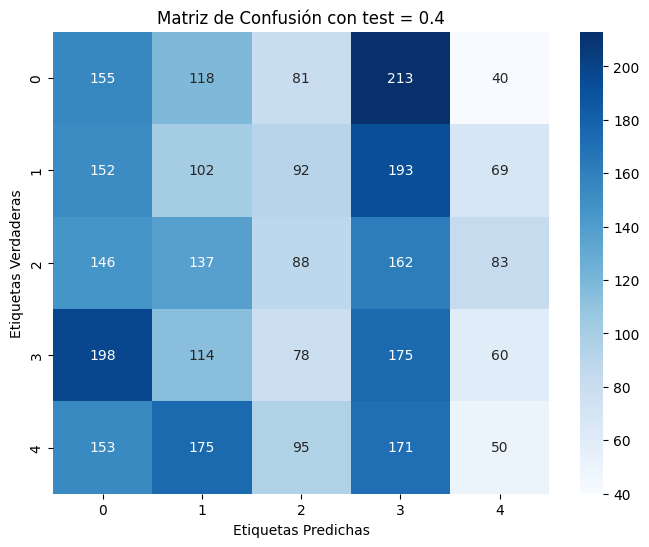

Exactitud del modelo: 0.18387096774193548
Precisión del modelo: 0.18200425439055334
Recall del modelo: 0.18387096774193548
Puntuación F1 del modelo: 0.17604374374107773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.5.png


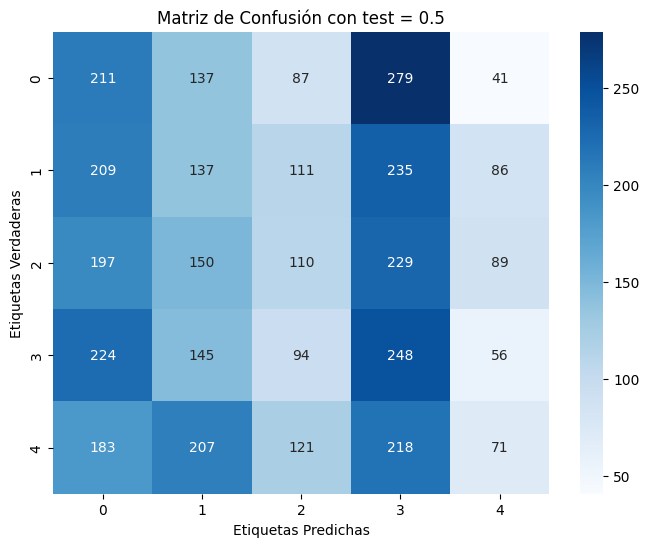

Exactitud del modelo: 0.20051612903225807
Precisión del modelo: 0.20099543093257072
Recall del modelo: 0.20051612903225807
Puntuación F1 del modelo: 0.1908493266868505
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.6.png


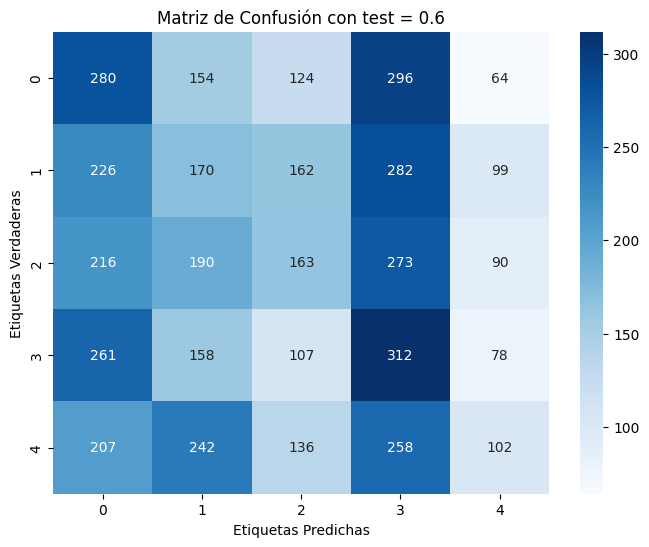

Exactitud del modelo: 0.22086021505376344
Precisión del modelo: 0.2223466064640141
Recall del modelo: 0.22086021505376344
Puntuación F1 del modelo: 0.21241545166088246
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.7.png


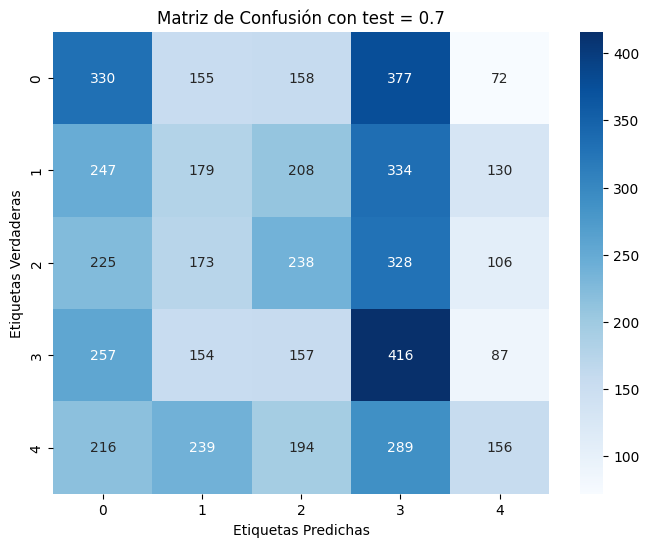

Exactitud del modelo: 0.24313364055299538
Precisión del modelo: 0.24569177826967906
Recall del modelo: 0.24313364055299538
Puntuación F1 del modelo: 0.23535113961550963
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.8.png


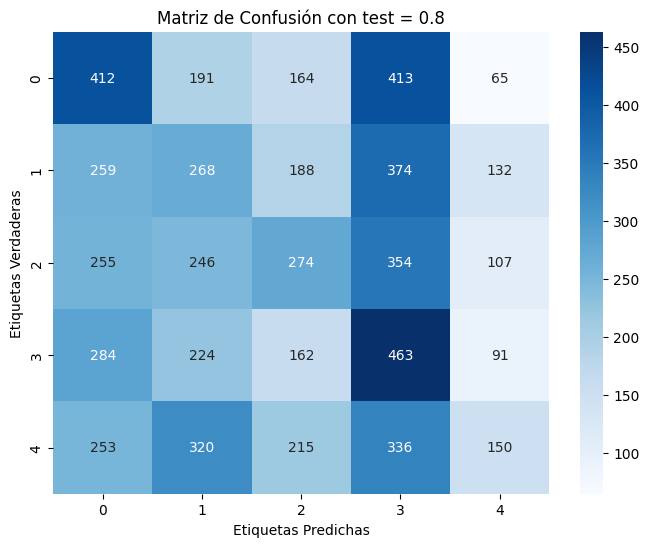

Exactitud del modelo: 0.25274193548387097
Precisión del modelo: 0.2569376078947448
Recall del modelo: 0.25274193548387097
Puntuación F1 del modelo: 0.2442982471412441
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/matriz_confusion_test_0.9.png


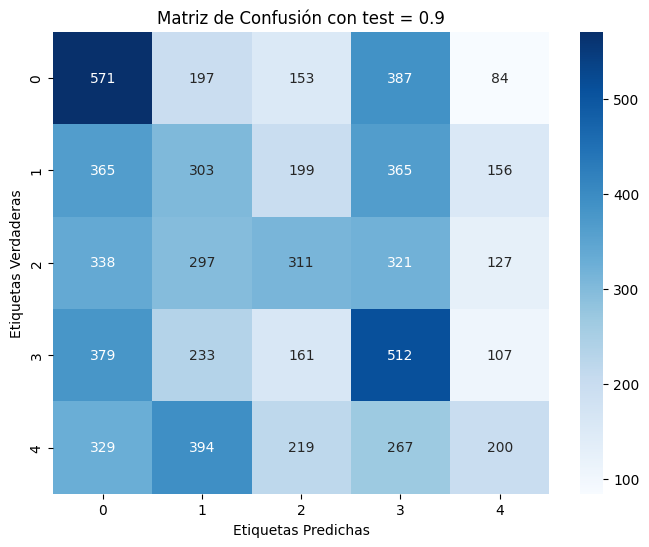

Exactitud del modelo: 0.27197132616487457
Precisión del modelo: 0.2745456592087141
Recall del modelo: 0.27197132616487457
Puntuación F1 del modelo: 0.26323079853350434
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_simple_13_vecinos/knn_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta KNN_val_cruz_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_2.png


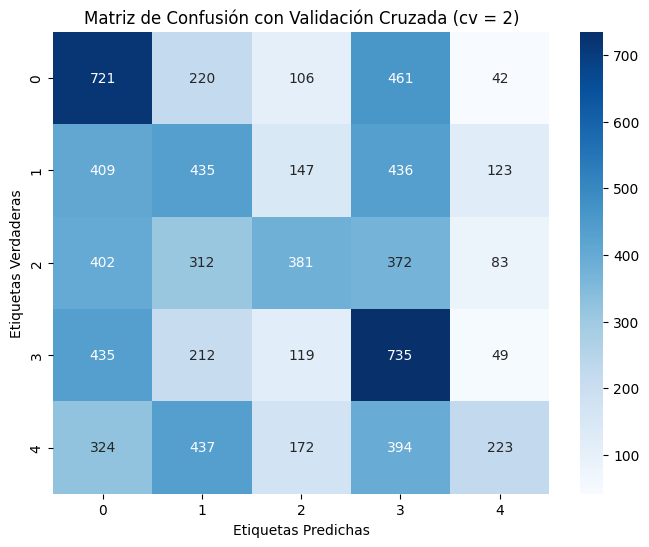

Exactitud media: 0.32193548387096776
Precisión media: 0.3462272737959845
Recall media: 0.32193548387096776
Puntuación F1 media: 0.30917918222762775
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_3.png


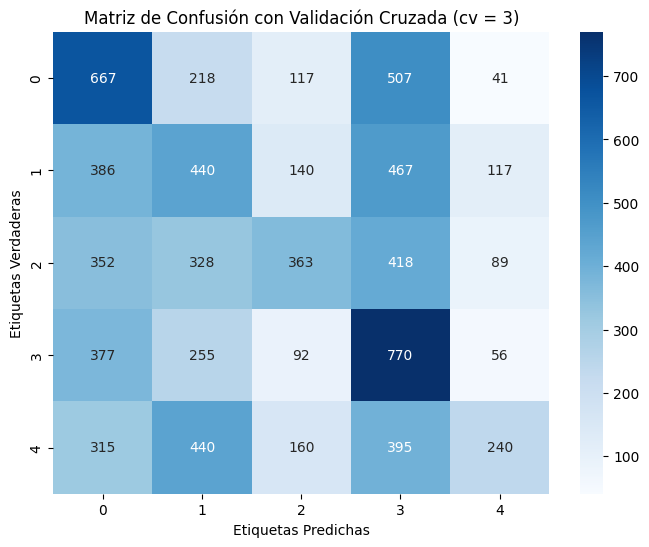

Exactitud media: 0.32
Precisión media: 0.3478459785432478
Recall media: 0.32
Puntuación F1 media: 0.3084398615469267
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_4.png


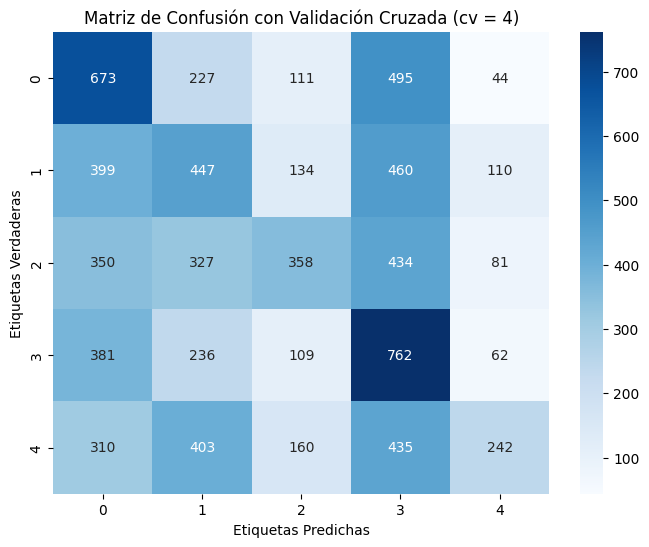

Exactitud media: 0.32025806451612904
Precisión media: 0.34905181904504345
Recall media: 0.32025806451612904
Puntuación F1 media: 0.30869887203248464
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_5.png


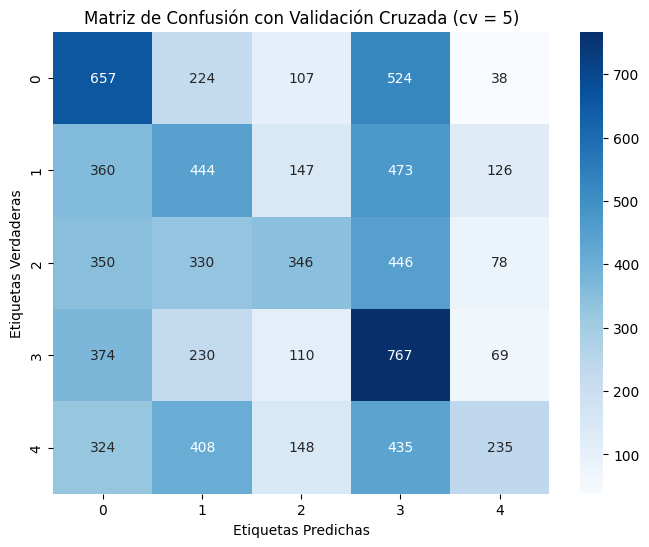

Exactitud media: 0.316
Precisión media: 0.3426401758803671
Recall media: 0.316
Puntuación F1 media: 0.30389807035692584
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_6.png


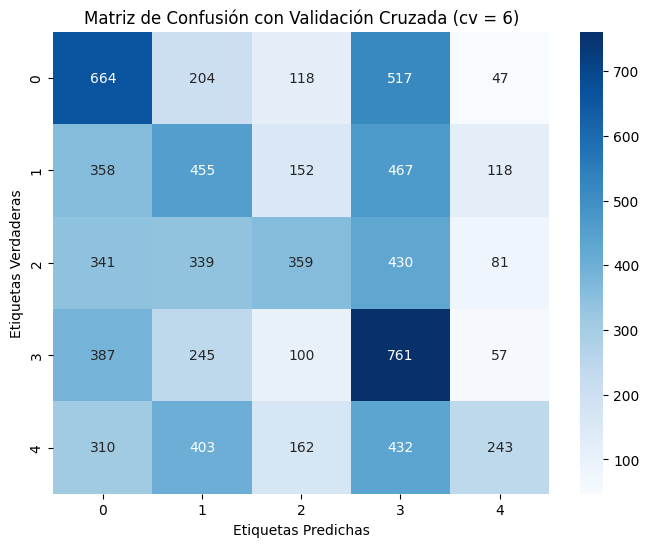

Exactitud media: 0.32025806451612904
Precisión media: 0.347727444216242
Recall media: 0.32025806451612904
Puntuación F1 media: 0.3089478688204314
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_7.png


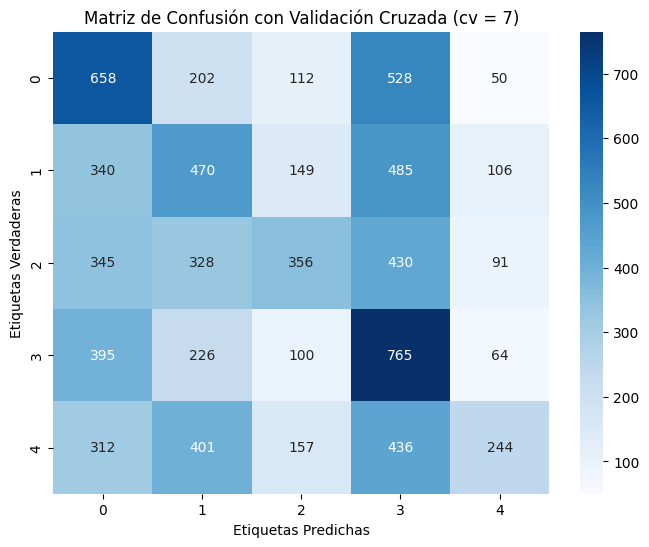

Exactitud media: 0.32167741935483873
Precisión media: 0.34922949524994773
Recall media: 0.32167741935483873
Puntuación F1 media: 0.31035947744500664
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_8.png


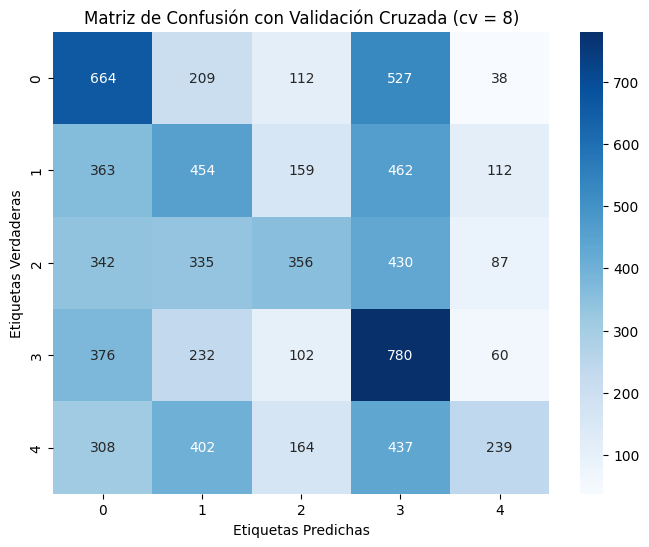

Exactitud media: 0.32167741935483873
Precisión media: 0.3484140046329944
Recall media: 0.32167741935483873
Puntuación F1 media: 0.3094398608865753
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_9.png


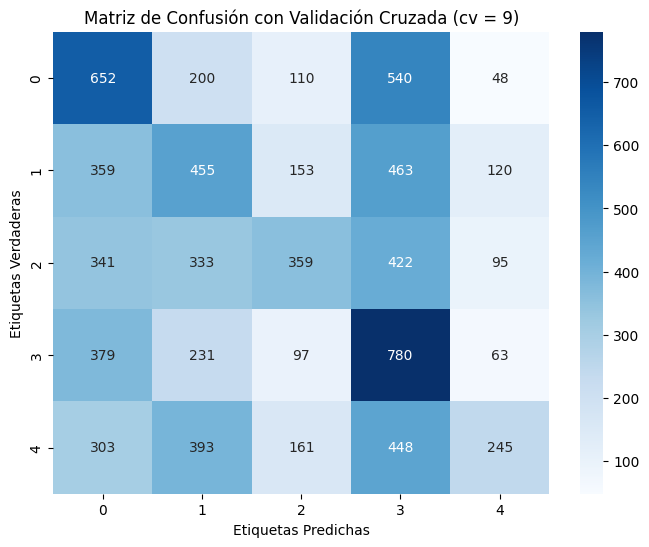

Exactitud media: 0.3214193548387097
Precisión media: 0.34676836754604606
Recall media: 0.3214193548387097
Puntuación F1 media: 0.30985832601958835
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta KNN_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/matriz_confusion_cv_10.png


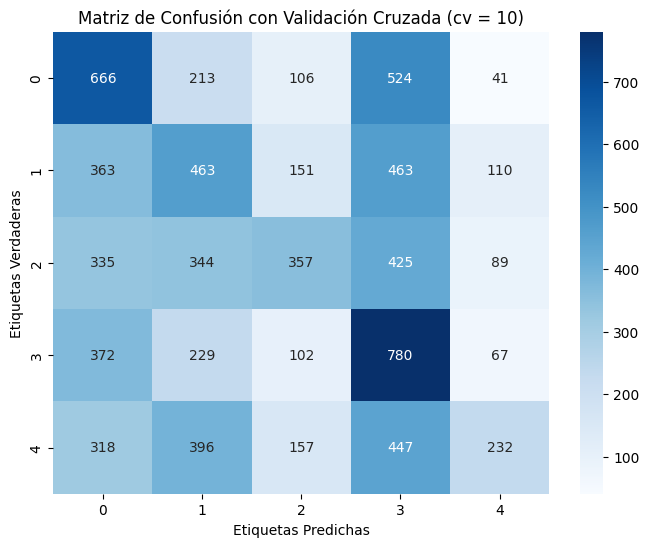

Exactitud media: 0.3223225806451613
Precisión media: 0.34812645359029437
Recall media: 0.3223225806451613
Puntuación F1 media: 0.30972259651509054
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/KNN_val_cruz_13_vecinos/knn_val_cruz.json


In [19]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/knn_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/knn_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
experimento = 1
for i in lista_valores:
    resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = knn_classification(df_junto,13,test_size_1=i)
    experimento = experimento + 1

almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)

lista = list(range(2, 11))
for j in lista:
    resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = knn_classification(df_junto,13,cv=j)

almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)